# Covid-19 dataset Forecasting Model 

In [1]:
# Importing Libraries for EDA
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns

In [2]:
# Loading Dataset from Library
df = pd.read_csv('covid19_Pakistan.csv')
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
1323,5/10/2020,709,8,29,Local - Social Contact,Sindh,Karachi
1324,5/10/2020,59,0,0,Local - Social Contact,Baluchistan,Quetta
1325,5/10/2020,12,0,1,Local - Social Contact,Gilgit-Baltistan,Gilgit
1326,5/10/2020,160,11,40,Local - Social Contact,Khyber Pakhtunkhwa,Peshawar


In [3]:
df.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [4]:
df.tail()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
1323,5/10/2020,709,8,29,Local - Social Contact,Sindh,Karachi
1324,5/10/2020,59,0,0,Local - Social Contact,Baluchistan,Quetta
1325,5/10/2020,12,0,1,Local - Social Contact,Gilgit-Baltistan,Gilgit
1326,5/10/2020,160,11,40,Local - Social Contact,Khyber Pakhtunkhwa,Peshawar
1327,5/10/2020,7,0,0,Local - Social Contact,Azad Jummu Kashmir,Muzaffarabad


In [5]:
#Checking for datatypes in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1328 non-null   object
 1   Cases           1328 non-null   int64 
 2   Deaths          1328 non-null   int64 
 3   Recovered       1328 non-null   int64 
 4   Travel_history  1328 non-null   object
 5   Province        1328 non-null   object
 6   City            1328 non-null   object
dtypes: int64(3), object(4)
memory usage: 72.8+ KB


In [6]:
# Checking the statistical Approach of Data 
df.describe()

,Cases,Deaths,Recovered
count,1328.000000,1328.000000,1328.000000
mean,22.647590,0.455572,2.467620
std,82.977344,1.804996,11.861503
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,10.000000,0.000000,0.000000
max,1080.000000,31.000000,208.000000


In [7]:
# Checking for the Null Values in the data 
df.isnull().sum()

Date              0
Cases             0
Deaths            0
Recovered         0
Travel_history    0
Province          0
City              0
dtype: int64

In [8]:
# Chwcking for unique values in every column 
df.nunique()

Date               67
Cases             138
Deaths             17
Recovered          49
Travel_history     15
Province           10
City              127
dtype: int64

In [9]:
# Checking the following column Headings and their Spellings 
df.columns

Index(['Date', 'Cases', 'Deaths', 'Recovered', 'Travel_history', 'Province',
       'City'],
      dtype='object')

In [10]:
# Spliting the data into different data type  for better understanding 
df.select_dtypes(include=['number']).head(10)

,Cases,Deaths,Recovered
0,1,0,0
1,2,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,1,0,0
7,6,0,0
8,3,0,0
9,1,0,0


In [11]:
df.select_dtypes(include=['object']).head(10)

,Date,Travel_history,Province,City
0,2/26/2020,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,Iran/Taftan,Sindh,Karachi
2,2/29/2020,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,Iran/Taftan,Sindh,Karachi
4,3/2/2020,Iran/Taftan,Gilgit-Baltistan,Gilgit
5,3/6/2020,Unknown,Sindh,Karachi
6,3/7/2020,Iran/Taftan,Sindh,Karachi
7,3/9/2020,Syria,Sindh,Karachi
8,3/9/2020,UK,Sindh,Karachi
9,3/10/2020,Iran/Taftan,Sindh,Karachi


In [12]:
# Checking the spellings and total number of variables in different columns , so can analyze the data better.
df['City'].unique()

array(['Islamabad', 'Karachi', 'Gilgit', 'Hyderabad', 'Quetta', 'Skardu',
       'Taftan', 'Sukkur', 'Lahore', 'Dera Ismail Khan', 'Mardan',
       'Mansehra', 'Dera Ghazi Khan', 'Peshawar', 'Charsadda', 'Buner',
       'Mardan ', 'Hangu ', 'Mirpur', 'Multan', 'Nagar', 'Khyber',
       'Rawalpindi', 'Jehlum', 'Gujrat ', 'Gujranwala', 'Karak', 'Dadu',
       'South Waziristan', 'Sargodha', 'Faisalabad', 'Mandi Bahauddin',
       'Rahim yar khan', 'Astore', 'Swabi', 'Gujrat', 'Kharmang',
       'Dir Upper', 'Swat', 'Mianwali', 'Narowal', 'Nankana', 'Attock',
       'Bahawal Nagar', 'Shigar', 'Larkana', 'Shangla', 'Nowshera',
       'Orakzai', 'Malakand', 'Kohat', 'Khushab', 'Vehari', 'Raiwind',
       'Dir Lower', 'Abbottabad', 'Bahawalpur', 'Rahim Yar Khan',
       'Muzaffarabad', 'Ghanche', 'Bajaur', 'Bannu', 'Hafizabad', 'Kasur',
       'Laiya', 'Jacobabad', 'Haripur', 'Kurrum', 'Bhambore ', 'Trarkhel',
       'Tank', 'Lodhran', 'Sialkot', 'Hangu', 'Chiniot', 'Sheikhupura',
       'La

In [13]:
#There is a spelling mistake in cities name (Islamabad)
df['City'] = df['City'].replace('ISlamabad','islamabad')

In [14]:
df.tail(20)

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
1308,5/8/2020,37,0,0,Local - Social Contact,islamabad Capital Territory,Islamabad
1309,5/8/2020,838,12,0,Local - Social Contact,Punjab,Lahore
1310,5/8/2020,598,5,0,Local - Social Contact,Sindh,Karachi
1311,5/8/2020,62,2,13,Local - Social Contact,Baluchistan,Quetta
1312,5/8/2020,371,12,53,Local - Social Contact,Khyber Pakhtunkhwa,Peshawar
1313,5/8/2020,2,0,0,Local - Social Contact,Azad Jummu Kashmir,Muzaffarabad
1314,5/9/2020,51,0,0,Local - Social Contact,islamabad Capital Territory,Islamabad
1315,5/9/2020,1060,0,0,Local - Social Contact,Punjab,Lahore
1316,5/9/2020,1080,5,0,Local - Social Contact,Sindh,Karachi
1317,5/9/2020,151,0,13,Local - Social Contact,Baluchistan,Quetta


In [15]:
df['Travel_history'].unique()

array(['China', 'Iran/Taftan', 'Unknown', 'Syria', 'UK',
       'Local - Social Contact', 'USA', 'KSA', 'Local - Covid Relative',
       'International Passenger', 'Dubai', 'Tableeghi Jamaat', 'Jail',
       'Afghanistan', 'India'], dtype=object)

In [16]:
# Checking if there are any duplicates in dataset
duplicat_rows = df[df.duplicated()]
if not duplicat_rows.empty:
    print('Duplicate Rows:')
    print (duplicat_rows)
else:
    print('No Duplicates')

Duplicate Rows:
          Date  Cases  Deaths  Recovered          Travel_history  \
1163  5/1/2020      0       0          1  Local - Social Contact   

              Province    City  
1163  Gilgit-Baltistan  Gilgit  


In [17]:
# Removing the duplicates from dataset 
df.drop_duplicates(inplace=True)

In [18]:
# Checking The duplicate is removed and no left 
duplicat_rows = df[df.duplicated()]
if not duplicat_rows.empty:
    print('Duplicate Rows:')
    print (duplicat_rows)
else:
    print('No Duplicates')

No Duplicates


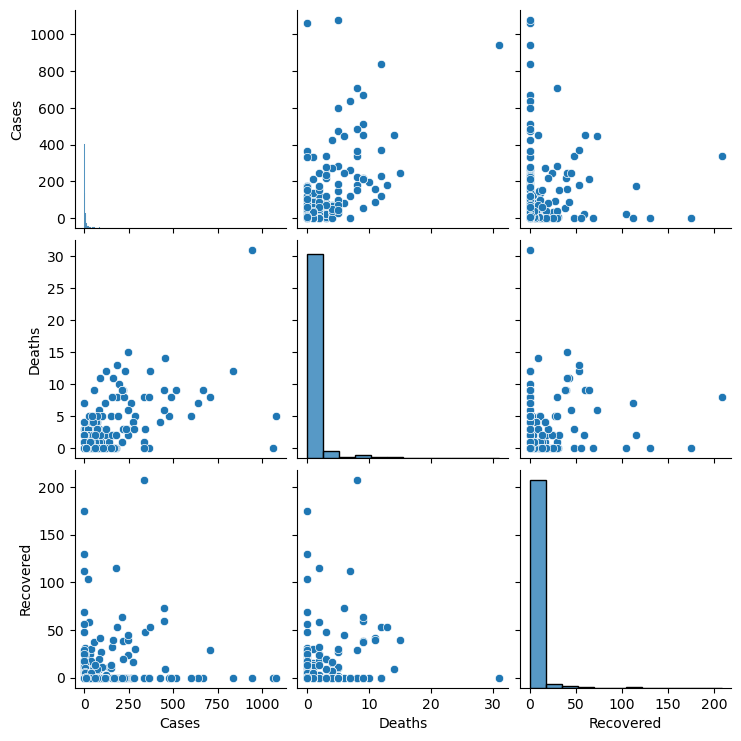

In [19]:
# Visualing the variables to understand their co-relation with the target variable
sns.pairplot(df)


In [20]:
import plotly.express as px
fig = px.bar(df, x='Deaths', y='Province')
fig.show()

In [21]:
fig = px.bar(df, x="Cases", y="Province", color="Travel_history", title="Gender and Payment data by Cities")
fig.show()

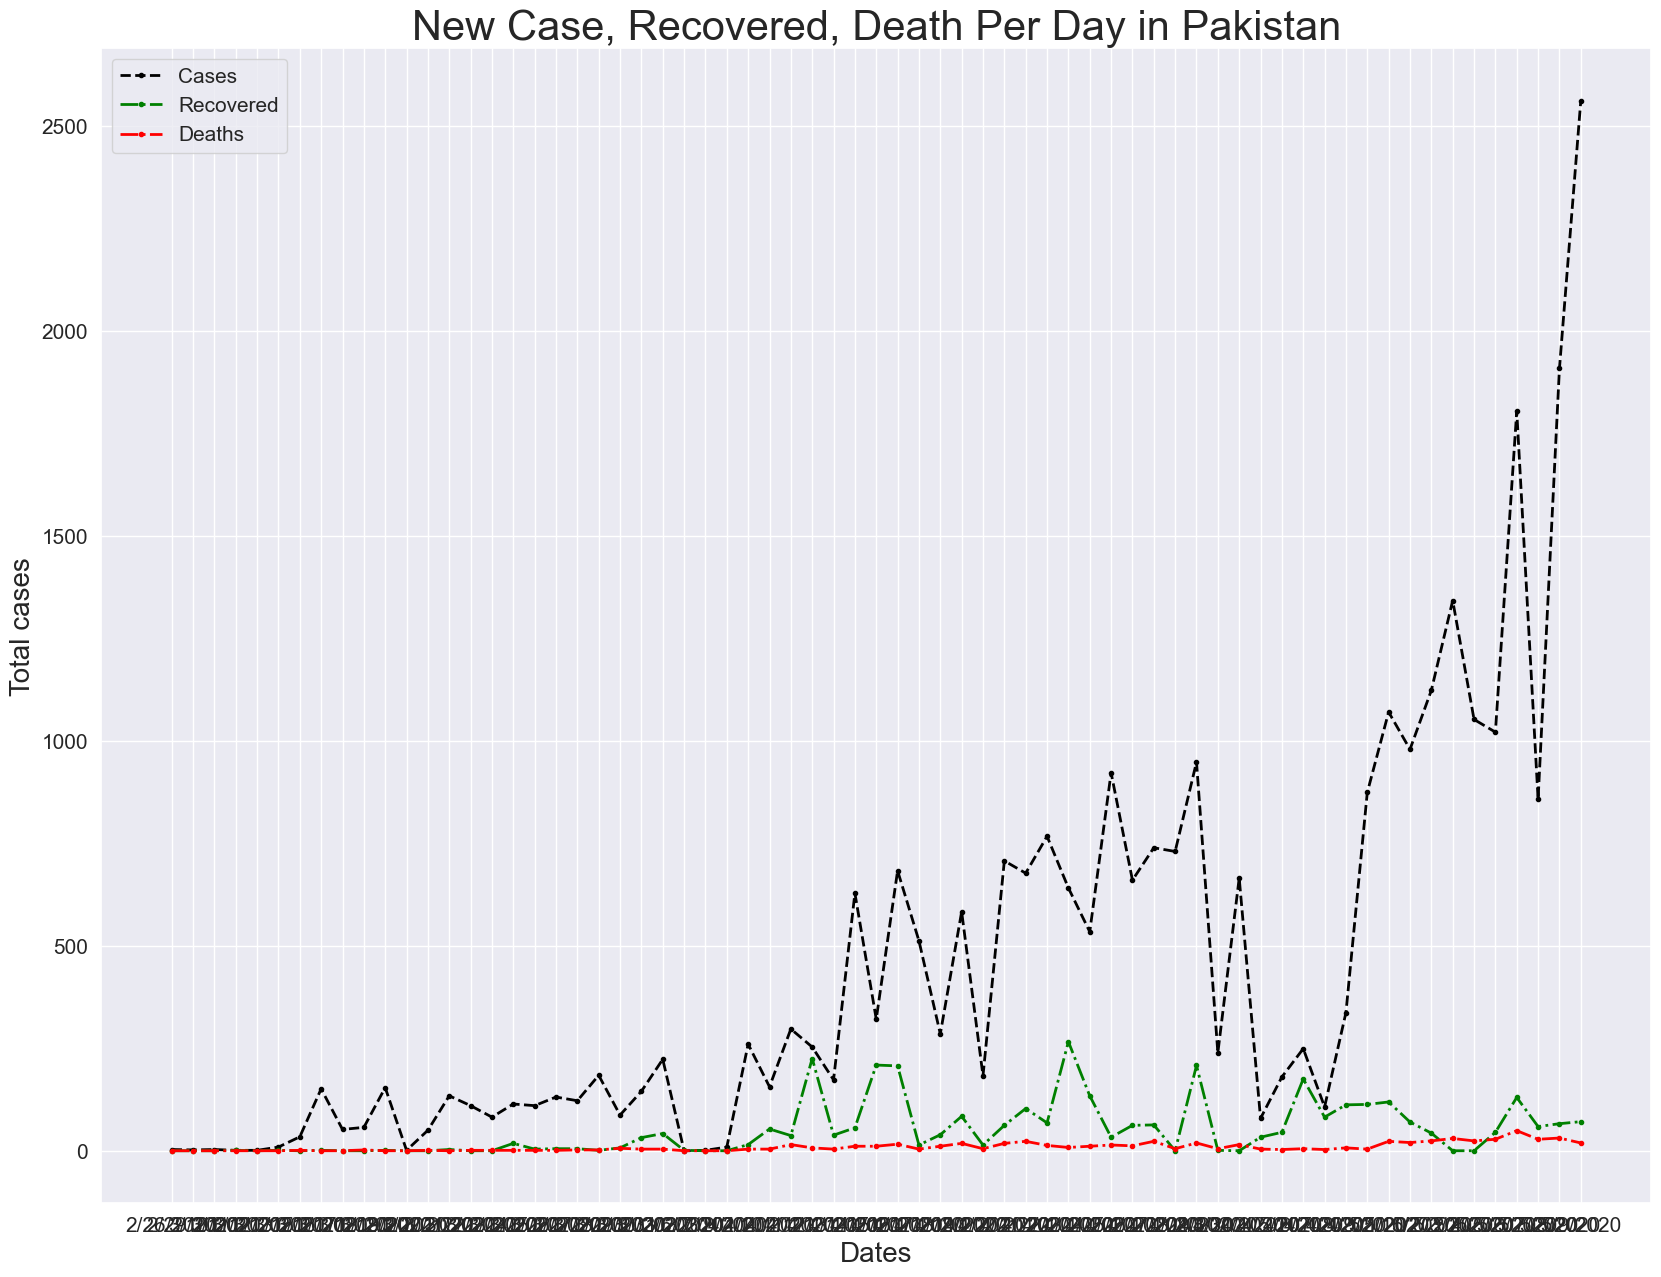

In [22]:
sns.set(font_scale=2.7)

plt.figure(figsize= (20,15))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("New Case, Recovered, Death Per Day in Pakistan" , fontsize = 30)

a = df.groupby('Date')['Cases'].sum().index 
b = df.groupby('Date')['Cases'].sum().values
plt.plot(a,b, marker = '.',ls='--',lw=2,color='black')

x = df.groupby('Date')['Recovered'].sum().index
y = df.groupby('Date')['Recovered'].sum().values
plt.plot(x,y, marker = '.', ls='dashdot',lw=2,color='green')

c = df.groupby('Date')['Deaths'].sum().index 
d = df.groupby('Date')['Deaths'].sum().values
plt.plot(c,d, marker = '.', ls='dashdot',lw=2,color='red')


plt.legend(["Cases", 'Recovered', 'Deaths'], loc ="upper left", fontsize=15)
plt.show()

In [23]:
from prophet import Prophet
import plotly.graph_objects as go

In [24]:
df['Active_Cases'] = df['Cases'] - df['Recovered'] - df['Deaths']

In [25]:
# d_new = df.groupby('Date')['Active_Cases'].sum().reset_index()
# d_new.columns = ['ds', 'y']

# m = Prophet()
# m.fit(d_new)

# future = m.make_future_dataframe(periods=30)
# forecast = m.predict(future)

# fig = go.Figure()

# fig.add_trace(go.Scatter( x = forecast['ds'], y = forecast['yhat'],
#                         mode='lines+markers',name='Predicted Cases',marker_color='DarkSlateGray'))
# fig.add_trace(go.Scatter( x = d_new['ds'], y = d_new['y'],
#                          mode='lines+markers',name='Actual Cases',marker_color='Tomato'))

In [26]:
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Active_Cases
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,1
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi,2
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,1
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi,1
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,1
...,...,...,...,...,...,...,...,...
1323,5/10/2020,709,8,29,Local - Social Contact,Sindh,Karachi,672
1324,5/10/2020,59,0,0,Local - Social Contact,Baluchistan,Quetta,59
1325,5/10/2020,12,0,1,Local - Social Contact,Gilgit-Baltistan,Gilgit,11
1326,5/10/2020,160,11,40,Local - Social Contact,Khyber Pakhtunkhwa,Peshawar,109


In [27]:
d_new = df.groupby('Date')['Active_Cases'].sum().reset_index()
d_new.columns = ['ds', 'y']

In [28]:
d_new

,ds,y
0,2/26/2020,3
1,2/29/2020,2
2,3/10/2020,3
3,3/11/2020,0
4,3/12/2020,1
...,...,...
62,5/5/2020,948
63,5/6/2020,1625
64,5/7/2020,770
65,5/8/2020,1811


In [29]:
import plotly.graph_objects as go
from prophet import Prophet  
d_new = df.groupby('Date')['Active_Cases'].sum().reset_index()
d_new.columns = ['ds', 'y']

m = Prophet()
m.fit(d_new)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

actual_trace = go.Scatter(
    x=d_new['ds'],
    y=d_new['y'],
    mode='lines+markers',  # Combine line and markers
    name='Actual Values'
)

predicted_trace = go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',  # Only line for predictions
    name='Predicted Values'
)

# Create the Plotly figure with both traces
fig = go.Figure(data=[actual_trace, predicted_trace])

# Customize chart title and labels
fig.update_layout(
    title="Time Series Forecast",
    xaxis_title="Date",
    yaxis_title="Values"
)

fig.show()

16:53:21 - cmdstanpy - INFO - Chain [1] start processing
16:53:22 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
if 'y' in d_new.columns:
    actual_fig = go.Figure(
        data=[go.Scatter(
            x=d_new['ds'],
            y=d_new['y'],
            mode='lines+markers',  # Combine line and markers
            name='Actual Values'
        )]
    )
    actual_fig.update_layout(
        title="Actual Values",
        xaxis_title="Date",
        yaxis_title="Values"
    )
# Create a figure for predicted values
predicted_fig = go.Figure(
    data=[go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat'],
        mode='lines',  # Only line for predictions
        name='Predicted Values'
    )]
)
predicted_fig.update_layout(
    title="Predicted Values",
    xaxis_title="Date",
    yaxis_title="Values"
)

# Display the figures (optional, adjust based on your environment)
if 'y' in d_new.columns:
    actual_fig.show()
predicted_fig.show()


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df


,ds,y
0,2020-02-26,3
1,2020-02-29,2
2,2020-03-10,3
3,2020-03-11,0
4,2020-03-12,1
...,...,...
62,2020-05-05,948
63,2020-05-06,1625
64,2020-05-07,770
65,2020-05-08,1811


In [ ]:
# Initializing the Model 
model = Prophet()

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model.fit(df)

17:26:32 - cmdstanpy - INFO - Chain [1] start processing
17:26:34 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
# Create future dates of 30 days 
future_dates = model.make_future_dataframe(periods=10)

In [ ]:
future_dates.tail()

,ds
72,2020-05-16
73,2020-05-17
74,2020-05-18
75,2020-05-19
76,2020-05-20


In [ ]:
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-26,-242.673451,-503.744165,84.412015,-242.673451,-242.673451,34.946427,34.946427,34.946427,34.946427,34.946427,34.946427,0.0,0.0,0.0,-207.727024
1,2020-02-29,-202.749637,-375.636981,271.525740,-202.749637,-202.749637,132.304643,132.304643,132.304643,132.304643,132.304643,132.304643,0.0,0.0,0.0,-70.444994
2,2020-03-02,-176.133762,-521.404197,112.658152,-176.133762,-176.133762,-25.507314,-25.507314,-25.507314,-25.507314,-25.507314,-25.507314,0.0,0.0,0.0,-201.641076
3,2020-03-06,-122.902010,-403.828880,224.082155,-122.902010,-122.902010,22.402009,22.402009,22.402009,22.402009,22.402009,22.402009,0.0,0.0,0.0,-100.500001
4,2020-03-07,-109.594072,-278.155382,342.753529,-109.594072,-109.594072,132.304643,132.304643,132.304643,132.304643,132.304643,132.304643,0.0,0.0,0.0,22.710571
